# News Classification

### Importing all the required Libraries

In [2]:
import re
import nltk
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import feature_extraction, feature_selection, model_selection, naive_bayes, pipeline, manifold, preprocessing, svm

In [3]:
df = pd.read_csv('BBC News Train.csv')

In [4]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [5]:
df.shape

(1490, 3)

In [6]:
df['Text'][0]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

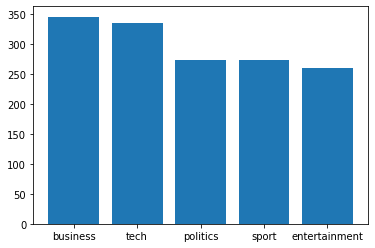

In [7]:
plt.bar(df['Category'].unique(),df['Category'].value_counts())
plt.show()

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91936\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stop_words = set(stopwords.words('english'))

In [10]:
Own_SW = []

### Finding Stop words in data

In [11]:
def finding_SW(limit):
    for i in range(0,limit):
        for j in df['Text'][0].split(' '):
            if j in stop_words:
                Own_SW.append(j)
                
    test = pd.DataFrame(Own_SW)
    test_SW = test[0].unique()
    print(test_SW)
    print(len(test[0].unique()))
    return(test_SW)

In [12]:
test_SW = finding_SW(10)

['against' 'a' 'of' 'have' 'as' 'their' 's' 'to' 'at' 'the' 'in' 'her'
 'an' 'has' 'not' 'and' 'that' 'but' 'who' 'now' 'own' 'on' 'had' 'she'
 'by' 'he' 'was' 'did' 'him' 'any' 'during' 'over' 'only' 'our' 'about'
 'if' 'all' 'is' 'from']
39


### Creating Own Stop Words

In [13]:
Own_SW_NC = ['a', 'of', 'have', 'as', 'their', 's', 'to', 'at', 'the', 'in', 'her', 'an', 'has', 
             'not', 'and', 'that', 'but', 'who', 'now', 'own', 'on', 'had', 'she', 'by', 'he', 'was', 
             'did', 'him', 'any', 'over', 'only', 'our', 'about', 'if', 'all', 'is', 'from', 'mr','mrs',
             'ms','said','told','was','had','us', 'could','his','with','his','was','also','for','i','my','they','we',
             'it','its','bt','aol','into']

### Pre processing the dataset

In [14]:
for id, sentence in df.iterrows():
    if type(sentence['Text']) is not int :
        string = ''
        
        data = re.sub('[^a-zA-Z0-9-\n]',' ',sentence['Text']) #ex-boss ->ex bos [^a-zA-Z0-9-\n]
        data = re.sub('\s+',' ', data)
        data = data.lower()
        
    for word in data.split(' '):
        if word not in Own_SW_NC:
            string = string + word +" "
            
    df['Text'][id] = string

C:\Users\91936\AppData\Local\Temp\ipykernel_9376\4136077558.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'][id] = string


In [15]:
df['Text'][0]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against battery fraud charges called company whistleblower first witness cynthia cooper worldcom ex-head internal accounting alerted directors irregular accounting practices telecoms giant 2002 warnings led collapse firm following discovery 11bn 5 7bn accounting fraud ebbers pleaded guilty charges fraud conspiracy prosecution lawyers argued ebbers orchestrated series accounting tricks worldcom ordering employees hide expenses inflate revenues meet wall street earnings estimates cooper runs consulting business jury new york wednesday external auditors arthur andersen approved worldcom accounting early 2001 2002 andersen given green light procedures practices used worldcom ebber lawyers unaware fraud arguing auditors alert problems cooper during shareholder meetings ebbers often passed technical questions company finance chief giving brief answers himself prosecution star witness former worldcom fina

### Lemmatization (Pre process)

In [16]:
lemmatizer = WordNetLemmatizer()

In [17]:
for sentence in df['Text'][0].split(' '):
    print(sentence,"->",lemmatizer.lemmatize(sentence)) 

worldcom -> worldcom
ex-boss -> ex-boss
launches -> launch
defence -> defence
lawyers -> lawyer
defending -> defending
former -> former
worldcom -> worldcom
chief -> chief
bernie -> bernie
ebbers -> ebbers
against -> against
battery -> battery
fraud -> fraud
charges -> charge
called -> called
company -> company
whistleblower -> whistleblower
first -> first
witness -> witness
cynthia -> cynthia
cooper -> cooper
worldcom -> worldcom
ex-head -> ex-head
internal -> internal
accounting -> accounting
alerted -> alerted
directors -> director
irregular -> irregular
accounting -> accounting
practices -> practice
telecoms -> telecom
giant -> giant
2002 -> 2002
warnings -> warning
led -> led
collapse -> collapse
firm -> firm
following -> following
discovery -> discovery
11bn -> 11bn
5 -> 5
7bn -> 7bn
accounting -> accounting
fraud -> fraud
ebbers -> ebbers
pleaded -> pleaded
guilty -> guilty
charges -> charge
fraud -> fraud
conspiracy -> conspiracy
prosecution -> prosecution
lawyers -> lawyer
arg

In [18]:
for id , sentence in df.iterrows():
    string = ' '
    for i in sentence['Text'].split(' '):
        data = lemmatizer.lemmatize(i)
        string = string + data +" "
        
    df['Text'][id] = string

C:\Users\91936\AppData\Local\Temp\ipykernel_9376\1757116173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'][id] = string


In [19]:
df['Text'][0]

' worldcom ex-boss launch defence lawyer defending former worldcom chief bernie ebbers against battery fraud charge called company whistleblower first witness cynthia cooper worldcom ex-head internal accounting alerted director irregular accounting practice telecom giant 2002 warning led collapse firm following discovery 11bn 5 7bn accounting fraud ebbers pleaded guilty charge fraud conspiracy prosecution lawyer argued ebbers orchestrated series accounting trick worldcom ordering employee hide expense inflate revenue meet wall street earnings estimate cooper run consulting business jury new york wednesday external auditor arthur andersen approved worldcom accounting early 2001 2002 andersen given green light procedure practice used worldcom ebber lawyer unaware fraud arguing auditor alert problem cooper during shareholder meeting ebbers often passed technical question company finance chief giving brief answer himself prosecution star witness former worldcom financial chief scott sulliv

### Spliting the dataset

In [20]:
x = df['Text']
y = df['Category']

In [21]:
X_train, X_test , y_train ,y_test = train_test_split(x,y , train_size=0.2, random_state=43)

In [22]:
X_train.shape

(298,)

### TF-IDE Technique

In [23]:
#Tf-Idf
Vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

In [24]:
corpus = df['Text'] #---> [[sent_1],[sent_2],....]
a = Vectorizer.fit(corpus)
X_train = Vectorizer.transform(corpus)
dic_vocabulary = Vectorizer.vocabulary_ #---> each vocabulary it will assign a frequency value

In [25]:
print(a)

TfidfVectorizer(max_features=10000, ngram_range=(1, 2))


In [26]:
print(X_train)
print(X_train.shape)

  (0, 9947)	0.0375818535514712
  (0, 9898)	0.014114451706237893
  (0, 9826)	0.514554955597327
  (0, 9768)	0.11149597703010175
  (0, 9461)	0.023257804061609256
  (0, 9460)	0.03529609437287743
  (0, 9413)	0.04178076707330761
  (0, 9385)	0.05510541037784034
  (0, 9384)	0.04989568738461611
  (0, 9265)	0.0633362400941955
  (0, 9231)	0.055747988515050875
  (0, 9208)	0.028352312184714127
  (0, 9076)	0.058836047747944036
  (0, 8962)	0.05339438235878028
  (0, 8537)	0.04989568738461611
  (0, 8522)	0.047311862753360245
  (0, 8507)	0.044167071142205326
  (0, 8326)	0.10479580171712098
  (0, 8239)	0.03706045141844966
  (0, 8156)	0.03057404216870899
  (0, 7752)	0.04376062673143042
  (0, 7682)	0.03463757306901536
  (0, 7670)	0.05106839482062553
  (0, 7551)	0.06487104217746593
  (0, 7550)	0.0491842058205319
  :	:
  (1489, 1607)	0.02267833964820796
  (1489, 1376)	0.043925526344760935
  (1489, 1357)	0.13761576883004165
  (1489, 1283)	0.034285957733204406
  (1489, 1224)	0.025316879182879563
  (1489, 1215)

<AxesSubplot:>

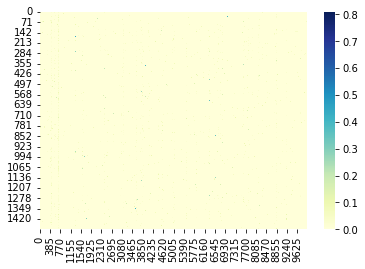

In [27]:
sns.heatmap(X_train.todense(),cmap="YlGnBu")

In [28]:
dic_vocabulary

{'worldcom': 9826,
 'ex': 3162,
 'boss': 1418,
 'launch': 4961,
 'defence': 2452,
 'lawyer': 4971,
 'defending': 2457,
 'former': 3590,
 'chief': 1803,
 'bernie': 1260,
 'ebbers': 2890,
 'against': 466,
 'battery': 1022,
 'fraud': 3645,
 'charge': 1770,
 'called': 1590,
 'company': 2015,
 'first': 3472,
 'witness': 9768,
 'cooper': 2203,
 'head': 4097,
 'internal': 4537,
 'accounting': 340,
 'director': 2614,
 'practice': 6708,
 'telecom': 8522,
 'giant': 3826,
 '2002': 120,
 'warning': 9413,
 'led': 5002,
 'collapse': 1947,
 'firm': 3461,
 'following': 3546,
 'discovery': 2638,
 '11bn': 35,
 '7bn': 265,
 'pleaded': 6599,
 'guilty': 4006,
 'conspiracy': 2123,
 'prosecution': 6867,
 'argued': 796,
 'series': 7682,
 'trick': 8962,
 'employee': 2993,
 'hide': 4154,
 'expense': 3211,
 'revenue': 7301,
 'meet': 5476,
 'wall': 9384,
 'street': 8239,
 'earnings': 2867,
 'estimate': 3097,
 'run': 7415,
 'consulting': 2137,
 'business': 1558,
 'jury': 4744,
 'new': 5879,
 'york': 9947,
 'wednes

### Feature Selection
#### . Applying Chi-square

In [29]:
y = df["Category"]
X_names = Vectorizer.get_feature_names()
p_value = 0.90

C:\Users\91936\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
X_names

['000',
 '000 are',
 '000 car',
 '000 copy',
 '000 job',
 '000 new',
 '000 people',
 '000 worker',
 '000 year',
 '000m',
 '05',
 '06',
 '10',
 '10 000',
 '10 000m',
 '10 day',
 '10 million',
 '10 minute',
 '10 year',
 '100',
 '100 000',
 '100 million',
 '100m',
 '100m champion',
 '101',
 '102',
 '104',
 '10bn',
 '10m',
 '10th',
 '11',
 '11 bankruptcy',
 '11 march',
 '11 september',
 '110',
 '11bn',
 '12',
 '12 march',
 '12 month',
 '12 year',
 '120',
 '120 000',
 '125',
 '12th',
 '13',
 '13 march',
 '13m',
 '14',
 '14 year',
 '140',
 '15',
 '15 000',
 '15 year',
 '150',
 '150 000',
 '1500m',
 '15th',
 '16',
 '16 year',
 '16bn',
 '17',
 '17 december',
 '17 january',
 '17 march',
 '17 year',
 '17m',
 '18',
 '18 month',
 '18 year',
 '180',
 '19',
 '19 13',
 '1948',
 '1950s',
 '1956',
 '1960s',
 '1969',
 '1970',
 '1970s',
 '1973',
 '1974',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1980s',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1987',
 '1989',
 '1990s',
 '1991',
 '1992',
 '1993

In [31]:
df_features = pd.DataFrame()
for category in np.unique(y):
    chi2, p = feature_selection.chi2(X_train, y==category)
    df_features = df_features.append(pd.DataFrame({"feature":X_names, "score":1-p, "y":category}))
    
    df_features = df_features.sort_values(["y","score"], ascending=[True,False])
    
    df_features = df_features[df_features["score"]>p_value]
    
X_names = df_features["feature"].unique().tolist()

C:\Users\91936\AppData\Local\Temp\ipykernel_9376\2092079701.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(pd.DataFrame({"feature":X_names, "score":1-p, "y":category}))
C:\Users\91936\AppData\Local\Temp\ipykernel_9376\2092079701.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(pd.DataFrame({"feature":X_names, "score":1-p, "y":category}))
C:\Users\91936\AppData\Local\Temp\ipykernel_9376\2092079701.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(pd.DataFrame({"feature":X_names, "score":1-p, "y":category}))
C:\Users\91936\AppData\Local\Temp\ipykernel_9376\2092079701.py:4: FutureWarning: The frame.append method is depr

In [32]:
df_features.head(10)

,feature,score,y
987,bank,1.000000,business
3986,growth,1.000000,business
6085,oil,0.999999,business
2902,economy,0.999998,business
6829,profit,0.999996,business
7020,rate,0.999993,business
7747,share,0.999990,business
9991,yukos,0.999990,business
2895,economic,0.999985,business
6770,price,0.999970,business


In [33]:
df_features.shape

(1768, 3)

In [34]:
for category in np.unique(y):
    print(category,":")
    print("  selected features:",len(df_features[df_features["y"]==category]))
    print("  Top features:", ",".join(df_features[df_features["y"]==category]["feature"].values[:10]))
    print(" ")

business :
  selected features: 293
  Top features: bank,growth,oil,economy,profit,rate,share,yukos,economic,price
 
entertainment :
  selected features: 384
  Top features: film,award,actor,oscar,band,star,album,festival,chart,singer
 
politics :
  selected features: 320
  Top features: labour,election,blair,party,tory,minister,brown,lord,mp,howard
 
sport :
  selected features: 439
  Top features: match,champion,cup,england,chelsea,coach,injury,win,season,arsenal
 
tech :
  selected features: 332
  Top features: mobile,user,software,phone,technology,computer,microsoft,virus,broadband,gadget
 


In [35]:
Vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=X_names)
Vectorizer.fit(corpus)
X_train = Vectorizer.transform(corpus)
dic_vocabulary = Vectorizer.vocabulary_

In [36]:
print(len(dic_vocabulary))

1704


In [37]:
X_train

<1490x1704 sparse matrix of type '<class 'numpy.float64'>'
	with 62268 stored elements in Compressed Sparse Row format>

### MultinomialNB

In [38]:
classifier = naive_bayes.MultinomialNB()

In [39]:
model = pipeline.Pipeline([("vectorizer", Vectorizer),  
                           ("classifier", classifier)])

In [40]:
model["classifier"].fit(X_train, df["Category"].values)

MultinomialNB()

In [50]:
from sklearn import metrics

In [51]:
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob, multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print(metrics.classification_report(y_test, predicted))

Accuracy: 0.99
Auc: 1.0
               precision    recall  f1-score   support

     business       0.99      0.98      0.98       269
entertainment       0.99      0.98      0.99       219
     politics       0.98      0.99      0.98       218
        sport       0.99      1.00      0.99       278
         tech       0.98      0.99      0.98       208

     accuracy                           0.99      1192
    macro avg       0.99      0.99      0.99      1192
 weighted avg       0.99      0.99      0.99      1192



(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'business'),
  Text(0, 1.5, 'entertainment'),
  Text(0, 2.5, 'politics'),
  Text(0, 3.5, 'sport'),
  Text(0, 4.5, 'tech')])

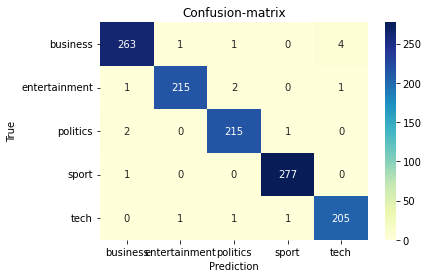

In [52]:
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d',cmap="YlGnBu")
ax.set(xlabel="Prediction", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion-matrix")
plt.yticks(rotation=0)

In [53]:
import pickle
with open('NB_classification.pkl', 'wb') as files:
    pickle.dump(model, files)

## SVM

In [54]:
svm_classifier = svm.SVC()

In [55]:
svm_model = pipeline.Pipeline([("vectorizer", Vectorizer),  
                           ("classifier", svm_classifier)])

In [56]:
svm_model["classifier"].fit(X_train, df["Category"].values)

SVC()

In [57]:
predicted = svm_model.predict(X_test)

In [58]:
accuracy = metrics.accuracy_score(y_test, predicted)
print("Accuracy:",  round(accuracy,2))
print(metrics.classification_report(y_test, predicted))

Accuracy: 1.0
               precision    recall  f1-score   support

     business       1.00      1.00      1.00       269
entertainment       1.00      1.00      1.00       219
     politics       1.00      1.00      1.00       218
        sport       1.00      1.00      1.00       278
         tech       1.00      1.00      1.00       208

     accuracy                           1.00      1192
    macro avg       1.00      1.00      1.00      1192
 weighted avg       1.00      1.00      1.00      1192



(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'business'),
  Text(0, 1.5, 'entertainment'),
  Text(0, 2.5, 'politics'),
  Text(0, 3.5, 'sport'),
  Text(0, 4.5, 'tech')])

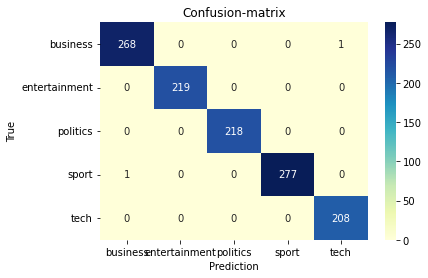

In [59]:
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d',cmap="YlGnBu")
ax.set(xlabel="Prediction", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion-matrix")
plt.yticks(rotation=0)

In [60]:
with open('SVM_classification.pkl', 'wb') as files:
    pickle.dump(svm_model, files)

## Testing

In [61]:
model = pickle.load(open("NB_classification.pkl", "rb"))

In [1]:
a = "profit"

In [63]:
print(a)

West Indies boosted by Hetmyer's return as India look to fine-tune T20I approach


In [64]:
model.predict([a])

array(['business'], dtype='<U13')